In [2]:
import pandas as pd
import numpy as np
import glob
import os

liga_path = r'/Users/tom/Documents/Coding/AiCore/Projects/4. Football Match Outcome Predictor /Results/liga_2'
all_files = glob.glob(os.path.join(liga_path, "*.csv"))
liga_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

liga_df

,Home_Team,Away_Team,Result,Link,Season,Round,League
0,FC Carl Zeiss Jena,Zwickau,2-0,https://www.besoccer.com/match/fc-carl-zeiss-j...,1996,1,2_liga
1,Chemnitzer,1. FC Lokomotive Leipzig,1-2,https://www.besoccer.com/match/chemnitzer/loko...,1996,1,2_liga
2,Arminia Bielefeld,VfB Lübeck,2-1,https://www.besoccer.com/match/arminia-bielefe...,1996,1,2_liga
3,MSV Duisburg,VfL Bochum,0-0,https://www.besoccer.com/match/msv-duisburg/bo...,1996,1,2_liga
4,Unterhaching,Meppen,1-1,https://www.besoccer.com/match/unterhaching/me...,1996,1,2_liga
...,...,...,...,...,...,...,...
10022,1. FC Lokomotive Leipzig,Wattenscheid 09,0-0,https://www.besoccer.com/match/lokomotive-leip...,1998,34,2_liga
10023,SC Freiburg,Stuttgarter Kickers,2-1,https://www.besoccer.com/match/sc-freiburg/stu...,1998,34,2_liga
10024,Gutersloh,Greuther Fürth,1-1,https://www.besoccer.com/match/gutersloh/greut...,1998,34,2_liga
10025,Nürnberg,Energie Cottbus,3-3,https://www.besoccer.com/match/fc-nurnberg/ene...,1998,34,2_liga


In [106]:
path = r'/Users/tom/Documents/Coding/AiCore/Projects/4. Football Match Outcome Predictor /Results'
all_files = glob.glob(os.path.join(path, "*"))

df_list = []

for path in all_files:
    all_csv_files = glob.glob(os.path.join(path, "*.csv"))
    df_name = (path.split("/")[9])
    df_list.append(f"{df_name}_df")
    globals()[f"{df_name}_df"] = pd.concat((pd.read_csv(f) for f in all_csv_files), ignore_index=True)



In [36]:
# Find how many unique teams there are in each league

for df in df_list:

    globals()[df]["Home_Team"] = globals()[df]["Home_Team"].astype('category')
    print(df)
    home_team_count = globals()[df]["Home_Team"].nunique()
    print(home_team_count)


championship_df
63
eerste_divisie_df
56
primeira_liga_df
43
ligue_1_df
49
segunda_division_df
96
serie_a_df
50
bundesliga_df
46
primera_division_df
51
liga_2_df
83
ligue_2_df
75
premier_league_df
52
eredivisie_df
32
segunda_liga_df
66
serie_b_df
87


In [41]:
# number of year played in each league df

for df in df_list:

    globals()[df]["Season"] = globals()[df]["Season"].astype('int64')
    print(df)
    season_count = globals()[df]["Season"].nunique()
    print(season_count)


globals()[df_list[5]]["Season"].unique()

championship_df
17
eerste_divisie_df
20
primeira_liga_df
32
ligue_1_df
32
segunda_division_df
32
serie_a_df
27
bundesliga_df
32
primera_division_df
32
liga_2_df
32
ligue_2_df
28
premier_league_df
32
eredivisie_df
32
segunda_liga_df
24
serie_b_df
32


array([2008, 2014, 1990, 2004, 2018, 1995, 2011, 2012, 2020, 1996, 2007,
       1993, 2002, 2017, 2010, 2019, 1994, 1991, 1998, 2015, 2009, 2016,
       1992, 2006, 1997, 2021, 2013])

In [4]:
globals()[df_list[5]].describe()

,Home_Team,Away_Team,Result,Link,Season,Round,League
count,9365,9365,9365,9365,9365,9365,9365
unique,50,50,52,9365,27,38,1
top,Roma,Lazio,1-1,https://www.besoccer.com/match/lazio/torino-fc...,2008,1,serie_a
freq,488,487,1226,1,380,259,9365


In [ ]:
# Finding trends in the data set features
# For example, for each year, does the trend of the number of home wins change?

championship_season_group = championship_df.groupby("Season") 

# Get the first entries of all the groups formed
#season_group.first()

# Group by each season ie 1990

championship_season_1990 = championship_season_group.get_group(1990)

championship_season_1990["Home_Team"] = championship_season_1990["Home_Team"].astype('category')
championship_season_1990["Away_Team"] = championship_season_1990["Away_Team"].astype('category')
championship_season_1990["Result"] = championship_season_1990["Result"].astype('string')
championship_season_1990["Season"] = championship_season_1990["Season"].astype('int')
championship_season_1990["Round"] = championship_season_1990["Round"].astype('int')
championship_season_1990["League"] = championship_season_1990["League"].astype('string')
championship_season_1990["Home_Goals"] = championship_season_1990["Result"].apply(lambda x: x.split("-")[0])
championship_season_1990["Away_Goals"] = championship_season_1990["Result"].apply(lambda x: x.split("-")[1])
championship_season_1990["Home_Win"] = championship_season_1990["Home_Goals"] > championship_season_1990["Away_Goals"]
home_win_count = championship_season_1990["Home_Win"].sum()


In [ ]:
# Put together to work for all seasons in one league
#create pd df for seasons in championship
championship_seasons_df = pd.DataFrame(championship_df["Season"].unique(), columns=['season'])
championship_seasons_df = championship_seasons_df.sort_values("season", ascending=True)
championship_seasons_df["home_win_count"] = 0

# For each year calculate count of home wins

for year in championship_df["Season"].unique():

    df_year = championship_season_group.get_group(year)
    df_year["Home_Team"] = df_year["Home_Team"].astype('category')
    df_year["Away_Team"] = df_year["Away_Team"].astype('category')
    df_year["Result"] = df_year["Result"].astype('string')
    df_year["Season"] = df_year["Season"].astype('int')
    df_year["Round"] = df_year["Round"].astype('int')
    df_year["League"] = df_year["League"].astype('string')
    df_year["Home_Goals"] = df_year["Result"].apply(lambda x: x.split("-")[0])
    df_year["Away_Goals"] = df_year["Result"].apply(lambda x: x.split("-")[1])
    df_year["Home_Win"] = df_year["Home_Goals"] > df_year["Away_Goals"]
    home_win_count = df_year["Home_Win"].sum()
    # add that sum to the season df
    championship_seasons_df.loc[championship_seasons_df.season == year, "home_win_count"] = home_win_count

    



In [81]:
# drop incorrect data

ligue_1_df = ligue_1_df.loc[ligue_1_df["Result"] != "18 MAR"]


In [ ]:
# Put together to work for all seasons in another league for comparison
#create pd df for seasons in championship

ligue_1_season_group = ligue_1_df.groupby("Season") 

ligue_1_seasons_df = pd.DataFrame(ligue_1_df["Season"].unique(), columns=['season'])
ligue_1_seasons_df = ligue_1_seasons_df.sort_values("season", ascending=True)
ligue_1_seasons_df["home_win_count"] = 0

# For each year calculate count of home wins

for year in ligue_1_seasons_df["season"].values:

    df_year = ligue_1_season_group.get_group(year)
    df_year["Home_Team"] = df_year["Home_Team"].astype('category')
    df_year["Away_Team"] = df_year["Away_Team"].astype('category')
    df_year["Result"] = df_year["Result"].astype('string')
    df_year["Season"] = df_year["Season"].astype('int')
    df_year["Round"] = df_year["Round"].astype('int')
    df_year["League"] = df_year["League"].astype('string')
    df_year["Home_Goals"] = df_year["Result"].apply(lambda x: x.split("-")[0])
    df_year["Away_Goals"] = df_year["Result"].apply(lambda x: x.split("-")[1])
    df_year["Home_Win"] = df_year["Home_Goals"] > df_year["Away_Goals"]
    home_win_count = df_year["Home_Win"].sum()
    # add that sum to the season df
    ligue_1_seasons_df.loc[ligue_1_seasons_df.season == year, "home_win_count"] = home_win_count

/opt/miniconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


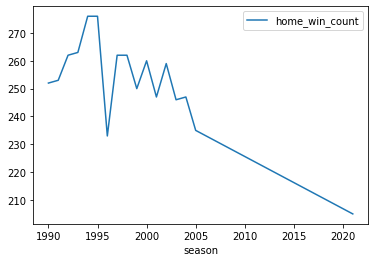

In [83]:
fig_1 = championship_seasons_df.plot.line(x='season', y='home_win_count')

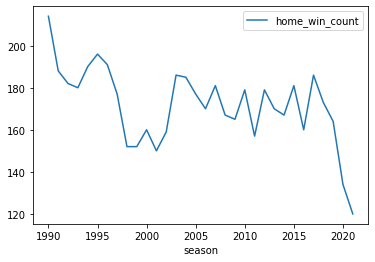

In [84]:
fig_1 = ligue_1_seasons_df.plot.line(x='season', y='home_win_count')

In [ ]:
premier_league_df["Result"].value_counts()

less_than_10 = (np_df.loc[: , "phone number"].str.len() < 10)

#to iterate over dataframe rows

for index, row in np_df.iterrows():

In [ ]:
# Put together to work for all seasons in one league
#create pd df for seasons in championship
championship_seasons_df = pd.DataFrame(championship_df["Season"].unique(), columns=['season'])
championship_seasons_df = championship_seasons_df.sort_values("season", ascending=True)
championship_seasons_df["home_win_count"] = 0

championship_df["Home_Team"] = championship_df["Home_Team"].astype('category')
championship_df["Away_Team"] = championship_df["Away_Team"].astype('category')
championship_df["Result"] = championship_df["Result"].astype('string')
championship_df["Season"] = championship_df["Season"].astype('int')
championship_df["Round"] = championship_df["Round"].astype('int')
championship_df["League"] = championship_df["League"].astype('string')
championship_df["Home_Goals"] = championship_df["Result"].apply(lambda x: x.split("-")[0])
championship_df["Away_Goals"] = championship_df["Result"].apply(lambda x: x.split("-")[1])
championship_df["Home_Win"] = championship_df["Home_Goals"] > championship_df["Away_Goals"]

championship_season_group = championship_df.groupby("Season")

for year in championship_seasons_df["season"].values:
    df_year = championship_season_group.get_group(year)
    home_win_count = df_year["Home_Win"].sum()
    # add that sum to the season df
    championship_seasons_df.loc[championship_seasons_df.season == year, "home_win_count"] = home_win_count
    

championship_seasons_df

# For each year calculate count of home wins
# Ask if there is a better way of doing this

#for index, row in championship_df.iterrows():

    
    #home_win_count = championship_df["Home_Win"].sum()
    # add that sum to the season df

    #championship_seasons_df.loc[championship_seasons_df.season == year, "home_win_count"] = home_win_count

In [127]:
result_df = pd.concat((globals()[df] for df in df_list), ignore_index=True)


In [128]:
invalid_score_1 = (result_df.loc[: , "Result"].str.contains(":"))
invalid_score_2 = (result_df.loc[: , "Result"].str.len() > 5)
invalid_score_3 = (result_df.loc[: , "Result"].str.len() < 2)


result_df = result_df.replace("1 (0-0) 1", np.NaN)
result_df = result_df.replace("0 (0-0) 0", "0-0")
result_df = result_df.replace("3 (3-2) 2", "3-2")
result_df = result_df.replace("0 (0-1) 1", "0-1")

result_df[invalid_score_1] = np.NaN
result_df[invalid_score_2] = np.NaN
result_df[invalid_score_3] = np.NaN



result_df["Result"].unique()

result_df = result_df.dropna(subset=["Result"])







In [ ]:
result_df["Home_Team"] = result_df["Home_Team"].astype('category')
result_df["Away_Team"] = result_df["Away_Team"].astype('category')
result_df["Result"] = result_df["Result"].astype('string')
result_df["Season"] = result_df["Season"].astype('int')
result_df["Round"] = result_df["Round"].astype('int')
result_df["League"] = result_df["League"].astype('string')
result_df["Home_Goals"] = result_df["Result"].apply(lambda x: x.split("-")[0])
result_df["Away_Goals"] = result_df["Result"].apply(lambda x: x.split("-")[1])
result_df["Home_Win"] = result_df["Home_Goals"] > result_df["Away_Goals"]

result_df


In [133]:
result_league_df = result_df.groupby("League")
result_league_df.get_group("premier_league")

,Home_Team,Away_Team,Result,Link,Season,Round,League,Unnamed: 0,Home_Goals,Away_Goals,Home_Win
103381,Hull City,Leicester,2-1,https://www.besoccer.com/match/hull-city/leice...,2017,1,premier_league,NaN,2,1,True
103382,Burnley,Swansea City,0-1,https://www.besoccer.com/match/burnley-fc/swan...,2017,1,premier_league,NaN,0,1,False
103383,Crystal Palace,West Bromwich Albion,0-1,https://www.besoccer.com/match/crystal-palace-...,2017,1,premier_league,NaN,0,1,False
103384,Everton,Tottenham Hotspur,1-1,https://www.besoccer.com/match/everton-fc/tott...,2017,1,premier_league,NaN,1,1,False
103385,Middlesbrough,Stoke City,1-1,https://www.besoccer.com/match/middlesbrough-f...,2017,1,premier_league,NaN,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
115793,Stoke City,West Ham,2-1,https://www.besoccer.com/match/stoke-city/west...,2016,38,premier_league,NaN,2,1,True
115794,Swansea City,Man. City,1-1,https://www.besoccer.com/match/swansea-city-af...,2016,38,premier_league,NaN,1,1,False
115795,Watford,Sunderland,2-2,https://www.besoccer.com/match/watford-fc/sund...,2016,38,premier_league,NaN,2,2,False
115796,West Bromwich Albion,Liverpool,1-1,https://www.besoccer.com/match/west-bromwich/l...,2016,38,premier_league,NaN,1,1,False


In [ ]:
championship_seasons_df = pd.DataFrame(championship_df["Season"].unique(), columns=['season'])
championship_seasons_df = championship_seasons_df.sort_values("season", ascending=True)
championship_seasons_df["home_win_count"] = 0

championship_df["Home_Team"] = championship_df["Home_Team"].astype('category')
championship_df["Away_Team"] = championship_df["Away_Team"].astype('category')
championship_df["Result"] = championship_df["Result"].astype('string')
championship_df["Season"] = championship_df["Season"].astype('int')
championship_df["Round"] = championship_df["Round"].astype('int')
championship_df["League"] = championship_df["League"].astype('string')
championship_df["Home_Goals"] = championship_df["Result"].apply(lambda x: x.split("-")[0])
championship_df["Away_Goals"] = championship_df["Result"].apply(lambda x: x.split("-")[1])
championship_df["Home_Win"] = championship_df["Home_Goals"] > championship_df["Away_Goals"]

championship_season_group = championship_df.groupby("Season")

for year in championship_seasons_df["season"].values:
    df_year = championship_season_group.get_group(year)
    home_win_count = df_year["Home_Win"].sum()
    # add that sum to the season df
    championship_seasons_df.loc[championship_seasons_df.season == year, "home_win_count"] = home_win_count

In [134]:
result_df.head(5)

,Home_Team,Away_Team,Result,Link,Season,Round,League,Unnamed: 0,Home_Goals,Away_Goals,Home_Win
0,Watford,Middlesbrough,1-0,https://www.besoccer.com/match/watford-fc/midd...,2021,1,championship,NaN,1,0,True
1,Birmingham City,Brentford,1-0,https://www.besoccer.com/match/birmingham-city...,2021,1,championship,NaN,1,0,True
2,Wycombe Wanderers,Rotherham United,0-1,https://www.besoccer.com/match/wycombe-wandere...,2021,1,championship,NaN,0,1,False
3,AFC Bournemouth,Blackburn Rovers,3-2,https://www.besoccer.com/match/afc-bournemouth...,2021,1,championship,NaN,3,2,True
4,Barnsley,Luton Town,0-1,https://www.besoccer.com/match/barnsley-fc/lut...,2021,1,championship,NaN,0,1,False
